In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df= pd.read_csv('../vehicles_us.csv')
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [59]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [60]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

## Limpieza de datos

* Comenzamos por llenar los espacios vacios

In [61]:
# Se asume que los NAN 'is_4wd' son '0.0'
df['is_4wd']= df['is_4wd'].fillna(0.0)

# Con los datos NaN en la columna 'cylinders' usaremos la 'moda'.
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])

# 'model_year' usaremos la mediana para llenar los datos vacios
df['model_year'] = df['model_year'].fillna(df['model_year'].median())

# en la columna 'odometer' usaremos la mediana
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

# y en 'paint_color' usaremos la moda
df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])

#Revision
print(df.isna().sum())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


* Cambiamos tipos de datos correctos

In [62]:
# Convertimos las siguientes columnas a tipo 'int'
df['model_year'] = df['model_year'].astype('int')
df['cylinders'] = df['cylinders'].astype('int')
df['odometer'] = df['odometer'].astype('int')
df['is_4wd'] = df['is_4wd'].astype('int')

#Revision
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.1+ MB


* Revisar si hay duplicados

In [63]:
print(df.duplicated().sum())

0


In [64]:
df.to_csv('../vehicles_clean.csv', index=False)

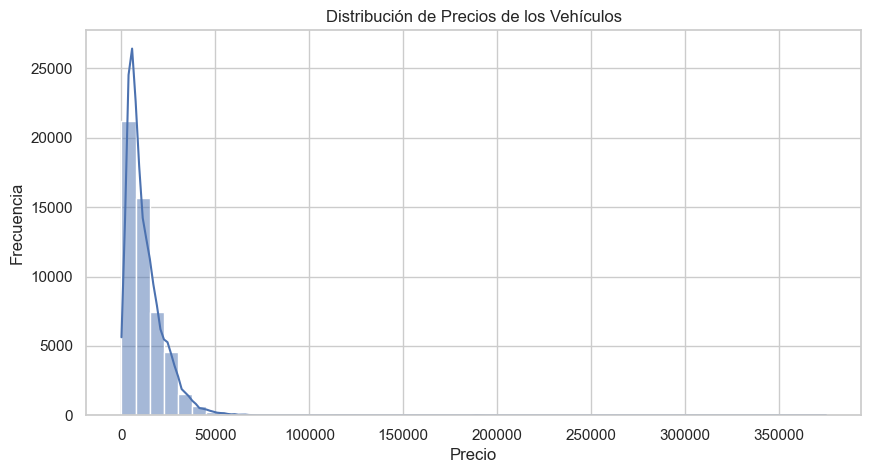

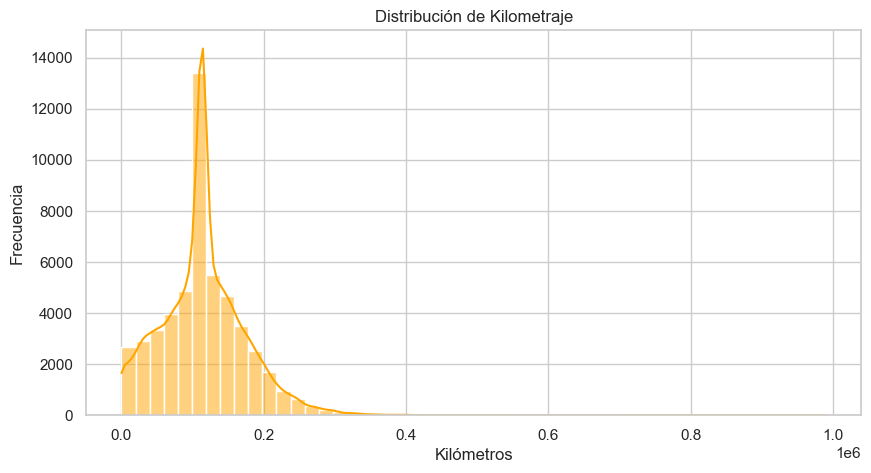

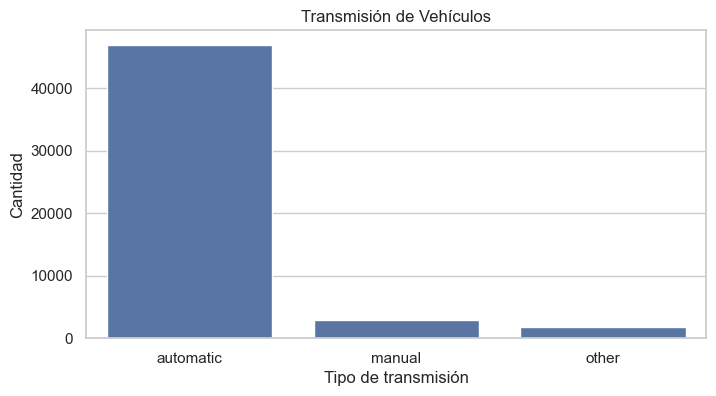

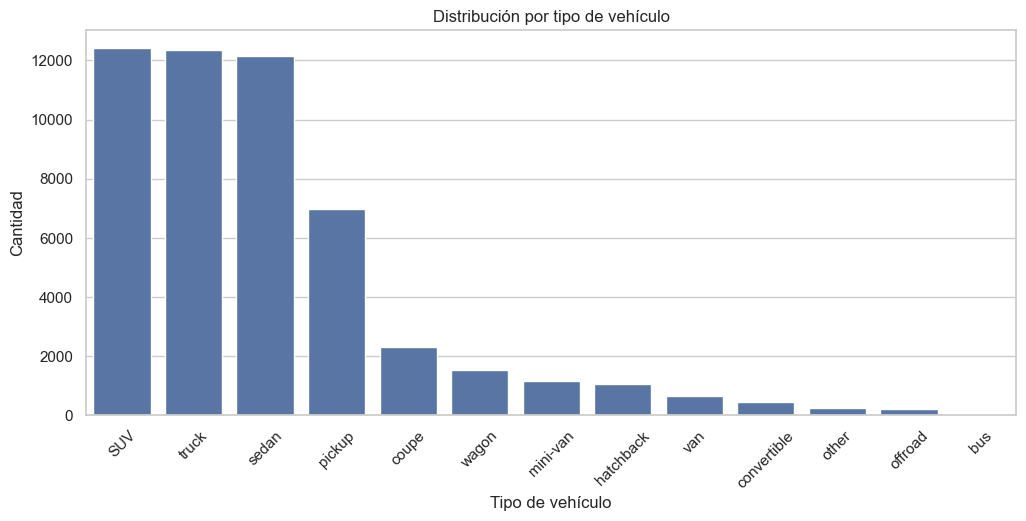

In [65]:
sns.set(style="whitegrid")

# Histograma de precios
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de Precios de los Vehículos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de kilometraje (odometer)
plt.figure(figsize=(10, 5))
sns.histplot(df['odometer'], bins=50, kde=True, color='orange')
plt.title('Distribución de Kilometraje')
plt.xlabel('Kilómetros')
plt.ylabel('Frecuencia')
plt.show()

# Conteo de tipos de transmisión
plt.figure(figsize=(8, 4))
sns.countplot(x='transmission', data=df)
plt.title('Transmisión de Vehículos')
plt.ylabel('Cantidad')
plt.xlabel('Tipo de transmisión')
plt.show()

# Conteo de tipos de vehículo
plt.figure(figsize=(12, 5))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title('Distribución por tipo de vehículo')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')
plt.xlabel('Tipo de vehículo')
plt.show()